In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from langdetect import detect
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter

In [2]:
df = pd.read_csv("../data/lyrics.csv")

In [3]:
df.head()

,artist,song,lyrics
0,Jack Ingram,Love You,"Dang the sun, dang this day I'm just tryin' to..."
1,Havana Brown (Ft. Pitbull),We Run the Night (Remix),"Havana Brown RedOne Mr Worldwide From Miami,..."
2,Ryan Cabrera,On the Way Down,Sick and tired of this world There's no more a...
3,Jordan Pruitt,Outside Looking In,You don't know my name You don't know anything...
4,Christina Grimmie,How to Love (The Voice Performance),You had a lot of crooks tryna steal your heart...


## Just English Songs

In [4]:
lyrics = df["lyrics"].to_list()
ignore = []
languages = {}
for i, lyric in enumerate(lyrics):
    try:
        lang = detect(lyric)
        if lang in languages:
            languages[lang] += 1
        else:
            languages[lang] = 1
        if lang != "en":
            ignore.append(i)
    except:
        print(i)
        ignore.append(i)

In [5]:
languages

{'en': 7840,
 'cy': 2,
 'es': 142,
 'tr': 23,
 'ru': 15,
 'de': 24,
 'ko': 7,
 'pt': 26,
 'tl': 3,
 'fr': 16,
 'id': 6,
 'it': 4,
 'ca': 3,
 'fa': 2,
 'nl': 2,
 'so': 2,
 'ja': 1,
 'he': 1,
 'pl': 2,
 'sv': 1,
 'el': 1,
 'lv': 1}

In [6]:
df = df.drop(ignore)

In [7]:
stop = stopwords.words("english")
ignore_letters = ["&", "ft.", "(Remix)", "-", '.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '/']
stop.append(ignore_letters)

## Song Titles Analysis

In [8]:
songs = df["song"].to_list()
song_words = []
for song in songs:
    song_split = song.split()
    for s in song_split:
        if s not in stop:
            song_words.append(s.lower())

Longest Song

In [9]:
max(songs, key=len)

'My City Of Ruins (Benefiting Artists For Peace And Justice Haiti Relief) [Live From The Kennedy Center Honors]'

Shortest Song

In [10]:
min(songs, key=len)

'8'

In [11]:
cnt = Counter(song_words)
cnt = cnt.most_common()
cnt = [x for x in cnt]

Text(0.5, 0, 'Word')

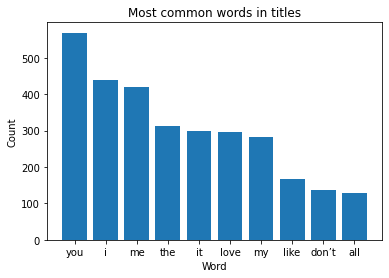

In [12]:
plt.bar([x[0] for x in cnt[:10]], [x[1] for x in cnt[:10]])
plt.title("Most common words in titles")
plt.ylabel('Count')
plt.xlabel('Word')

In [13]:
def getPolarity(text):
   return TextBlob(text).sentiment.polarity

In [14]:
sentiments = []
for i, song in enumerate(songs):
    sentiments.append(getPolarity(song))
 

In [15]:
sentiments_labels = {"positive": 0, "neutral": 0, "negative": 0}
for sentiment in sentiments:
    if sentiment > 0:
        sentiments_labels["positive"] += 1
    if sentiment == 0:
        sentiments_labels["neutral"] += 1
    else:
        sentiments_labels["negative"] += 1

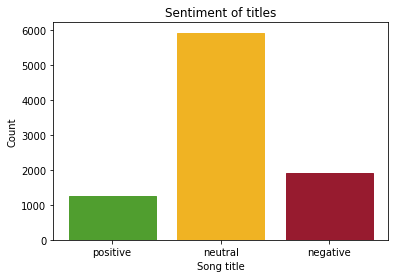

In [31]:
colors = ["#509e2f", "#f0b323", "#971b2f"]
plt.title("Sentiment of titles")
plt.ylabel('Count')
plt.xlabel('Song title')
barlist = plt.bar(sentiments_labels.keys(), sentiments_labels.values())
for i in range(3):
    barlist[i].set_color(colors[i])

## Lyrics

In [17]:
lyrics = df["lyrics"]

In [18]:
lyrics_merges = []
for lyric in lyrics:
    for s in lyric.split():
        if s.strip() not in stop:
            lyrics_merges.append(s.lower())

In [19]:
cnt = Counter(lyrics_merges)
cnt["-"] = 0 # work around for bug
cnt = cnt.most_common()
cnt = [x for x in cnt]

Text(0.5, 0, 'Word')

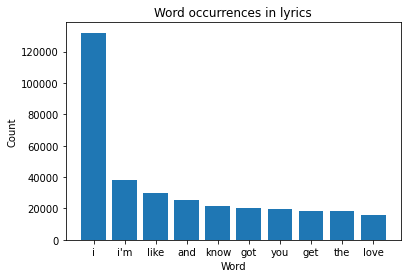

In [20]:
plt.bar([x[0] for x in cnt[:10]], [x[1] for x in cnt[:10]])
plt.title("Word occurrences in lyrics")
plt.ylabel('Count')
plt.xlabel('Word')

Text(0.5, 1.0, 'Wordcloud for lyrics')

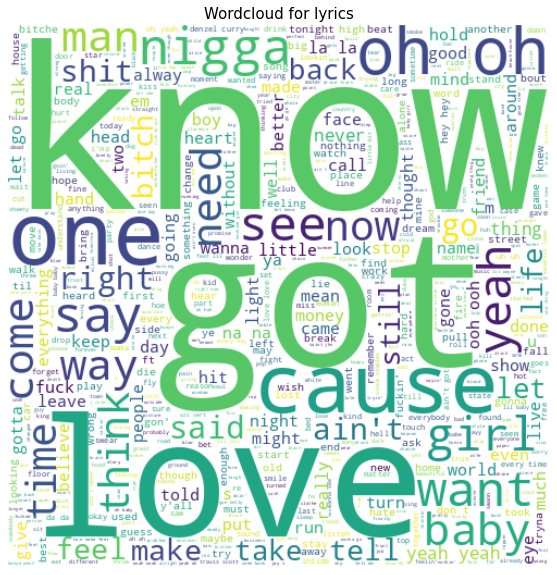

In [21]:
wordcloud = WordCloud(background_color="white", max_words=2000, max_font_size=256, random_state=42, width=500, height=500).generate(" ".join(lyrics_merges))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Wordcloud for lyrics", fontsize=15)

In [22]:
def getSubjective(text):
    return TextBlob(text).sentiment.subjectivity

In [23]:
sentiments_lyrics = []
subjectivity = []
for i, song in enumerate(lyrics):
    subjectivity.append(getSubjective(song))
    sentiments_lyrics.append(getPolarity(song))

In [24]:
subjective_labels = {"objective": 0, "neutral": 0, "subjective": 0}
for subjective in subjectivity:
    if subjective < 0.5:
        subjective_labels["objective"] += 1
    if subjective == 0:
        subjective_labels["neutral"] += 1
    else:
        subjective_labels["subjective"] += 1

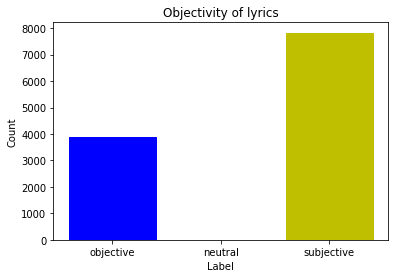

In [25]:
colors = ["b", "g", "y"]
plt.title("Objectivity of lyrics")
plt.ylabel('Count')
plt.xlabel('Label')
barlist = plt.bar(subjective_labels.keys(), subjective_labels.values())
for i in range(3):
    barlist[i].set_color(colors[i])

In [26]:
sentiments_lyrics_labels = {"positive": 0, "neutral": 0, "negative": 0}
for sentiment in sentiments_lyrics:
    if sentiment > 0:
        sentiments_lyrics_labels["positive"] += 1
    if sentiment == 0:
        sentiments_lyrics_labels["neutral"] += 1
    else:
        sentiments_lyrics_labels["negative"] += 1

In [27]:
sentiments_lyrics_labels

{'positive': 5539, 'neutral': 17, 'negative': 7823}

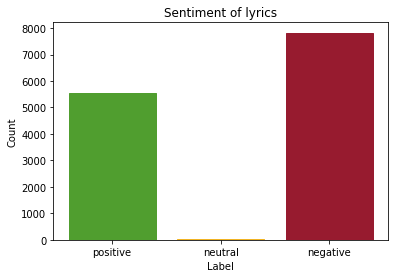

In [28]:
colors = ["#509e2f", "#f0b323", "#971b2f"]
plt.title("Sentiment of lyrics")
plt.ylabel('Count')
plt.xlabel('Label')
barlist = plt.bar(sentiments_lyrics_labels.keys(), sentiments_lyrics_labels.values())
for i in range(3):
    barlist[i].set_color(colors[i])

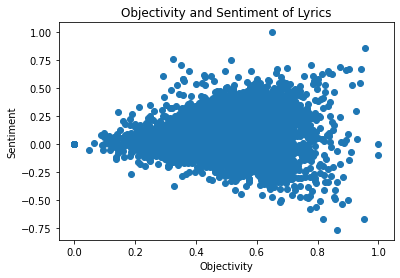

In [29]:
plt.title("Objectivity and Sentiment of Lyrics")
plt.xlabel("Objectivity")
plt.ylabel("Sentiment")
plt.scatter(subjectivity, sentiments_lyrics)

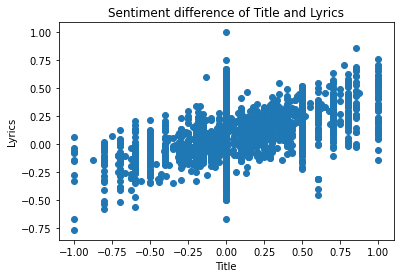

In [30]:
plt.title("Sentiment difference of Title and Lyrics")
plt.xlabel("Title")
plt.ylabel("Lyrics")
plt.scatter(sentiments, sentiments_lyrics)